# Face Recognition using Convolutional neural networks
### By Amirreza Shamsolhodaei

# Step 1:
## Packages

In [1]:
import keras
from keras.models import Sequential #Stacking The Layers
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam, RMSprop #Adam Optimizer
from keras.utils import np_utils #numpy utilities
from keras.callbacks import TensorBoard

import numpy as np #linear Algebra
import pandas as pd #Data Processing
import tensorflow as tf #tensorflow
import matplotlib.pyplot as plt #Plotting the result
import itertools #Functions creating iterators for efficient looping
 
from sklearn.model_selection import train_test_split #Skit Learn Library for machine Learning, Splitting Train and Test Datasets
from google.colab import files
%matplotlib inline

# Step 2:
## Loading the dataset

In [3]:
Dataset = np.load("/content/ORL_faces.npz")
Dataset.files

['testY', 'testX', 'trainX', 'trainY']

In [4]:
#Loading train images
x_train = Dataset['trainX']
#Normalizing train images
x_train = np.array(x_train,dtype='float32') / 255

#Loading test images
x_test = Dataset['testX']
#Normalizing test images
x_test = np.array(x_test,dtype='float32') / 255

#Loading the label of the images
y_train = Dataset['trainY']
y_test = Dataset['testY']

In [5]:
print('training images shape: \t', x_train.shape)
print('training labels shape: \t', y_train.shape)
print('test images shape: \t', x_test.shape)
print('test labels shape: \t', y_test.shape)


training images shape: 	 (240, 10304)
training labels shape: 	 (240,)
test images shape: 	 (160, 10304)
test labels shape: 	 (160,)


In [6]:
#Showing the train and test data formats
print('training images: \n', x_train)
print('test images: \n', x_test)
print('training labels shape: \n', y_train)
print('test labels shape: \n', y_test)

training images: 
 [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
test images: 
 [[0.16078432 0.18431373 0.18431373 ... 0.13725491 0.14509805 0.14901961]
 [0.17254902 0.16862746 0.1254902  ... 0.16862746 0.16862746 0.14509805]
 [0.16470589 0.16078432 0.17254902 ... 0.16470589 0.16862746 0.16078432]
 ...
 [0.39607844 0.39215687 0.40392157 ... 0.12156863 0.15686275 0.16470589]
 [0.4117647  0.42352942 0.41568628 ... 0.17254902 0.15686275 0.18431373]
 [0.44313726 0.44705883 0.43529412 ... 0.24313726 0.31764707 0.34901962]]
training labels shape: 
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  


## Showing the images
Here you will see the first 10 photos of the train dataset

In [7]:
X = np.reshape(Dataset['trainX'], (240, 112, 92))
Y = Dataset['trainY']
X_test = np.reshape(Dataset['testX'], (160, 112, 92))
Y_test = Dataset['testY']

 Training Images

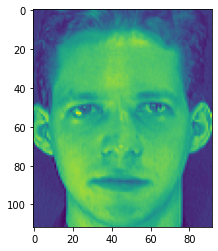

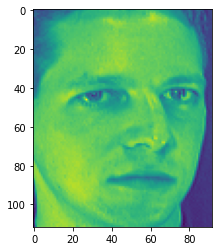

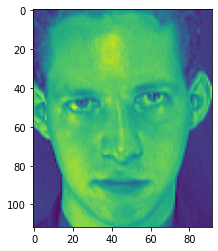

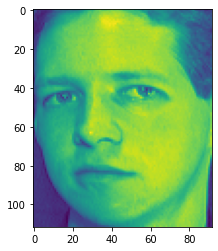

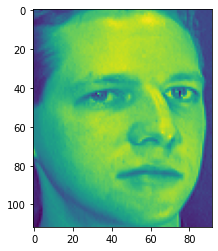

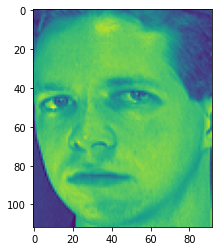

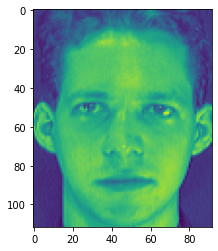

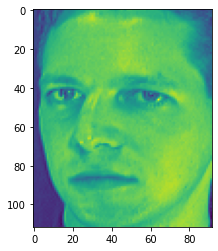

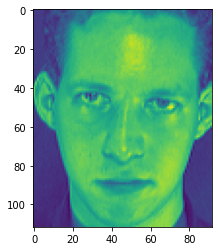

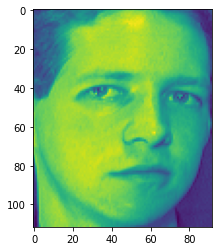

In [ ]:
for i in range(10):
   plt.figure()
   plt.imshow(X[i])


 Test images

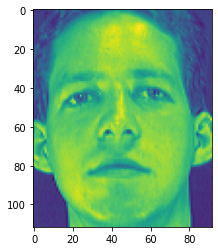

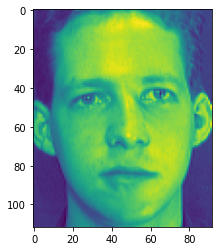

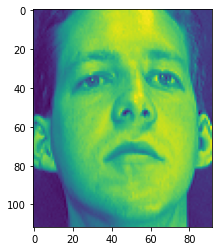

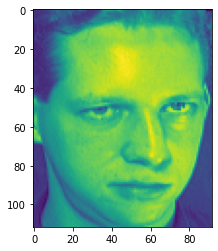

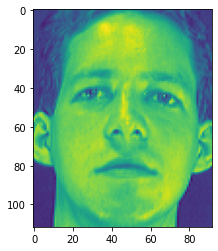

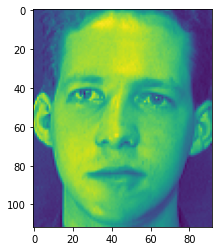

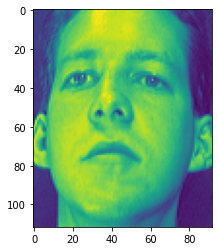

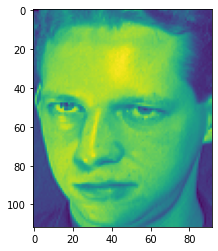

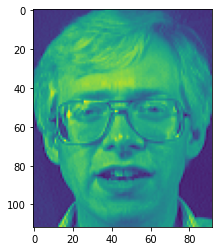

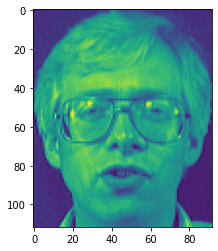

In [ ]:
for i in range(10):
   plt.figure()
   plt.imshow(X_test[i])


# Step 3:
## Data Validation and Reshaping the images

In [8]:
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=0.05, random_state=1234)

In [9]:
image_shape = (112, 92, 1)
batch_size = 512
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *image_shape)

print('x_train shape: ',y_train.shape[0])
print('x_test shape: ',y_test.shape)

x_train shape:  228
x_test shape:  (160,)


## Step 4:
## Creating and training CNN model

### Model number 1
Using 2 Convolution Layers, Average pooling and Relu

In [ ]:
model1= Sequential([
    Conv2D(filters = 36, kernel_size = 7, strides = (1, 1), padding='valid', activation = 'relu', kernel_initializer='glorot_uniform', input_shape = image_shape),
    AveragePooling2D(pool_size=2),
    Conv2D(filters = 54, kernel_size = 5, strides = (1, 1), padding='valid', activation = 'relu', kernel_initializer='glorot_uniform', input_shape = image_shape),
    AveragePooling2D(pool_size=2),
    Flatten(),
    Dense(units = 2024, activation='relu'),
    Dropout(0.5),
    Dense(units = 1024, activation='relu'),
    Dropout(0.5),
    Dense(units = 512, activation='relu'),
    Dropout(0.5),
    Dense(units = 20, activation='softmax')  
])

model1.compile(
    loss = 'sparse_categorical_crossentropy', 
    optimizer = Adam(learning_rate = 0.0001), 
    metrics= ['accuracy']
)
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 106, 86, 36)       1800      
_________________________________________________________________
average_pooling2d_4 (Average (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
average_pooling2d_5 (Average (None, 24, 19, 54)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 24624)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 2024)              49841000  
_________________________________________________________________
dropout_9 (Dropout)          (None, 2024)             

Training the Model

In [ ]:
trained1 = model1.fit(
    np.array(x_train), np.array(y_train), batch_size = 512,
    epochs = 300, verbose = 2, 
    validation_data = (np.array(x_valid), np.array(y_valid)),
)

Epoch 1/300
1/1 - 10s - loss: 3.0001 - accuracy: 0.0482 - val_loss: 2.9840 - val_accuracy: 0.0000e+00
Epoch 2/300
1/1 - 7s - loss: 3.0006 - accuracy: 0.0395 - val_loss: 2.9858 - val_accuracy: 0.0000e+00
Epoch 3/300
1/1 - 7s - loss: 2.9879 - accuracy: 0.0570 - val_loss: 2.9912 - val_accuracy: 0.0000e+00
Epoch 4/300
1/1 - 7s - loss: 3.0181 - accuracy: 0.0526 - val_loss: 2.9917 - val_accuracy: 0.0000e+00
Epoch 5/300
1/1 - 7s - loss: 3.0296 - accuracy: 0.0570 - val_loss: 2.9918 - val_accuracy: 0.0000e+00
Epoch 6/300
1/1 - 7s - loss: 2.9820 - accuracy: 0.0570 - val_loss: 2.9870 - val_accuracy: 0.0000e+00
Epoch 7/300
1/1 - 7s - loss: 2.9755 - accuracy: 0.0833 - val_loss: 2.9841 - val_accuracy: 0.0000e+00
Epoch 8/300
1/1 - 7s - loss: 2.9867 - accuracy: 0.0965 - val_loss: 2.9814 - val_accuracy: 0.0833
Epoch 9/300
1/1 - 7s - loss: 2.9789 - accuracy: 0.0921 - val_loss: 2.9801 - val_accuracy: 0.0833
Epoch 10/300
1/1 - 7s - loss: 2.9626 - accuracy: 0.0702 - val_loss: 2.9746 - val_accuracy: 0.0833


In [ ]:
Evaluation1 = model1.evaluate(x_test,y_test)
print('test loss:' , Evaluation1[0])
print('test accuracy:', Evaluation1[1])

5/5 [==============================] - 2s 278ms/step - loss: 0.5294 - accuracy: 0.9187
test loss: 0.5294294357299805
test accuracy: 0.918749988079071


In [ ]:
print(trained1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


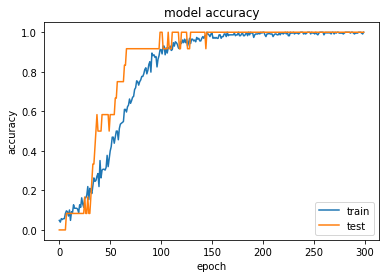

In [ ]:
#History for accuracy
plt.plot(trained1.history['accuracy'])
plt.plot(trained1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

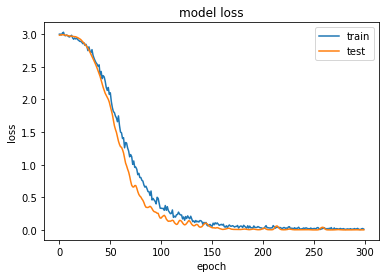

In [ ]:
#history for loss
plt.plot(trained1.history['loss'])
plt.plot(trained1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Model Number 2
using 3 conv layers, maxpooling and relu activation and RMSprop Optimizer

In [ ]:
model2= Sequential([
    Conv2D(filters = 32, kernel_size = 7, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='glorot_uniform', input_shape = image_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters = 16, kernel_size = 5, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='glorot_uniform', input_shape = image_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='glorot_uniform', input_shape = image_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(units = 2024 , activation='relu'),
    Dropout(0.2),
    Dense(units = 1024, activation='relu'),
    Dropout(0.2),
    Dense(units = 512, activation='relu'),
    Dropout(0.2),
    Dense(units = 20, activation='softmax')  
])

model2.compile(
    loss = 'sparse_categorical_crossentropy', 
    optimizer = RMSprop(), 
    metrics= ['accuracy']
)
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 112, 92, 32)       1600      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 46, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 46, 16)        12816     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 23, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 23, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 11, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2464)             

Training Model number 2

In [ ]:
trained2 = model2.fit(
    np.array(x_train), np.array(y_train), batch_size = 512,
    epochs = 300, verbose = 2, 
    validation_data = (np.array(x_valid), np.array(y_valid)),
)

Epoch 1/300
1/1 - 6s - loss: 3.0197 - accuracy: 0.0570 - val_loss: 3.0483 - val_accuracy: 0.0000e+00
Epoch 2/300
1/1 - 5s - loss: 2.9926 - accuracy: 0.0482 - val_loss: 3.0258 - val_accuracy: 0.0000e+00
Epoch 3/300
1/1 - 5s - loss: 2.9900 - accuracy: 0.0789 - val_loss: 3.4521 - val_accuracy: 0.0000e+00
Epoch 4/300
1/1 - 5s - loss: 3.0701 - accuracy: 0.0570 - val_loss: 2.9816 - val_accuracy: 0.0000e+00
Epoch 5/300
1/1 - 5s - loss: 2.9925 - accuracy: 0.0614 - val_loss: 2.9586 - val_accuracy: 0.0000e+00
Epoch 6/300
1/1 - 5s - loss: 2.9627 - accuracy: 0.0833 - val_loss: 2.9168 - val_accuracy: 0.0000e+00
Epoch 7/300
1/1 - 5s - loss: 2.8789 - accuracy: 0.0965 - val_loss: 3.3971 - val_accuracy: 0.0833
Epoch 8/300
1/1 - 5s - loss: 3.2483 - accuracy: 0.0921 - val_loss: 3.1818 - val_accuracy: 0.0000e+00
Epoch 9/300
1/1 - 5s - loss: 3.1991 - accuracy: 0.0789 - val_loss: 2.9712 - val_accuracy: 0.0000e+00
Epoch 10/300
1/1 - 5s - loss: 2.9537 - accuracy: 0.0877 - val_loss: 2.8981 - val_accuracy: 0.16

In [ ]:
Evaluation2 = model2.evaluate(x_test, y_test)
print('test loss:' , Evaluation2[0])
print('test accuracy:', Evaluation2[1])

5/5 [==============================] - 1s 160ms/step - loss: 0.3114 - accuracy: 0.9500
test loss: 0.3114401400089264
test accuracy: 0.949999988079071


In [ ]:
print(trained2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


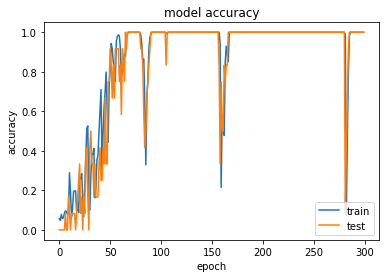

In [ ]:
#History for accuracy
plt.plot(trained2.history['accuracy'])
plt.plot(trained2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

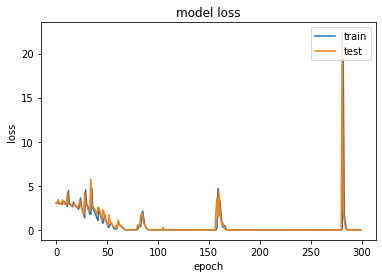

In [ ]:
#history for loss
plt.plot(trained2.history['loss'])
plt.plot(trained2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Model Number 3
using 2 conv layers, maxpooling and tanh activation and Adam Optimizer

In [10]:
model3= Sequential([
    Conv2D(filters = 32, kernel_size = 7, strides = (1, 1), activation = 'tanh', kernel_initializer='glorot_uniform', input_shape = image_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters = 16, kernel_size = 5, strides = (1, 1), activation = 'tanh', kernel_initializer='glorot_uniform', input_shape = image_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units = 2024 , activation='tanh'),
    Dense(units = 1024, activation='tanh'),
    Dense(units = 512, activation='tanh'),
    Dense(units = 20, activation='softmax')  
])
model3.compile(
    loss = 'sparse_categorical_crossentropy', 
    optimizer = 'adam', 
    metrics= ['accuracy']
)
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 32)       1600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7296)              0         
_________________________________________________________________
dense (Dense)                (None, 2024)              14769128  
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2

In [11]:
trained3 = model3.fit(
    np.array(x_train), np.array(y_train), batch_size = 512,
    epochs = 300, verbose = 2, 
    validation_data = (np.array(x_valid), np.array(y_valid)),
)

Epoch 1/300
1/1 - 19s - loss: 2.9966 - accuracy: 0.1184 - val_loss: 6.3749 - val_accuracy: 0.0000e+00
Epoch 2/300
1/1 - 4s - loss: 5.2394 - accuracy: 0.1053 - val_loss: 3.2085 - val_accuracy: 0.3333
Epoch 3/300
1/1 - 4s - loss: 3.1692 - accuracy: 0.3333 - val_loss: 4.3555 - val_accuracy: 0.1667
Epoch 4/300
1/1 - 4s - loss: 4.2263 - accuracy: 0.0614 - val_loss: 4.8678 - val_accuracy: 0.2500
Epoch 5/300
1/1 - 4s - loss: 3.8545 - accuracy: 0.3289 - val_loss: 4.1327 - val_accuracy: 0.2500
Epoch 6/300
1/1 - 4s - loss: 3.0156 - accuracy: 0.2982 - val_loss: 6.0282 - val_accuracy: 0.1667
Epoch 7/300
1/1 - 4s - loss: 6.6336 - accuracy: 0.0439 - val_loss: 5.0278 - val_accuracy: 0.0000e+00
Epoch 8/300
1/1 - 4s - loss: 3.5580 - accuracy: 0.1491 - val_loss: 4.9669 - val_accuracy: 0.0833
Epoch 9/300
1/1 - 4s - loss: 3.4298 - accuracy: 0.2061 - val_loss: 4.1553 - val_accuracy: 0.3333
Epoch 10/300
1/1 - 4s - loss: 3.2348 - accuracy: 0.4254 - val_loss: 4.0318 - val_accuracy: 0.1667
Epoch 11/300
1/1 - 4

In [13]:
Evaluation3 = model3.evaluate(x_test, y_test)
print('test loss:' , Evaluation3[0])
print('test accuracy:', Evaluation3[1])

5/5 [==============================] - 1s 144ms/step - loss: 0.4526 - accuracy: 0.9000
test loss: 0.45264822244644165
test accuracy: 0.8999999761581421


In [14]:
print(trained3.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


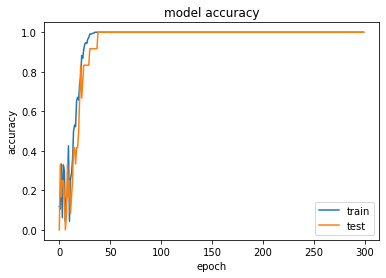

In [15]:
#History for accuracy
plt.plot(trained3.history['accuracy'])
plt.plot(trained3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

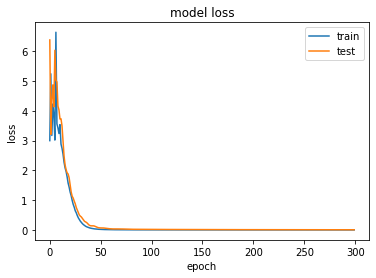

In [16]:
#history for loss
plt.plot(trained3.history['loss'])
plt.plot(trained3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()